In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv(r"..\FINAL-TF2-FILES\TF_2_Notebooks_and_Data\DATA\cancer_classification.csv")

In [3]:
# Data exploration
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe() # 30 columns of continuous datam, last column is categorical

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
# Preparing the data
X = df.iloc[:,:-1].values
y = df["benign_0__mal_1"].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Making sure we have consistent dimensions
X_train.shape,y_train.shape

((426, 30), (426,))

In [8]:
# Creating our model
model = Sequential()
num_hidden_layers=5
num_nodes = 16

model.add(Dense(30, activation="relu")) # Input layer. 30 neurons because input size=(30,)

for layer in range(num_hidden_layers):
    model.add(Dense(num_nodes, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid")) # Output layer. Sigmoid used because problem is of type binary classification.

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["acc"])

In [9]:
H = model.fit(X_train, y_train, batch_size=100, epochs=50, validation_split=0.2)

Train on 340 samples, validate on 86 samples
Epoch 1/50
340/340 [==============================] - 2s 5ms/sample - loss: 0.6961 - acc: 0.6118 - val_loss: 0.6927 - val_acc: 0.6047
Epoch 2/50
340/340 [==============================] - 0s 94us/sample - loss: 0.6845 - acc: 0.6118 - val_loss: 0.6812 - val_acc: 0.6047
Epoch 3/50
340/340 [==============================] - 0s 64us/sample - loss: 0.6632 - acc: 0.6441 - val_loss: 0.6678 - val_acc: 0.6047
Epoch 4/50
340/340 [==============================] - 0s 72us/sample - loss: 0.6578 - acc: 0.6618 - val_loss: 0.6546 - val_acc: 0.6047
Epoch 5/50
340/340 [==============================] - 0s 64us/sample - loss: 0.6392 - acc: 0.6500 - val_loss: 0.6411 - val_acc: 0.6047
Epoch 6/50
340/340 [==============================] - 0s 76us/sample - loss: 0.6347 - acc: 0.6382 - val_loss: 0.6264 - val_acc: 0.6047
Epoch 7/50
340/340 [==============================] - 0s 70us/sample - loss: 0.6106 - acc: 0.6441 - val_loss: 0.6095 - val_acc: 0.6047
Epoch 8/50


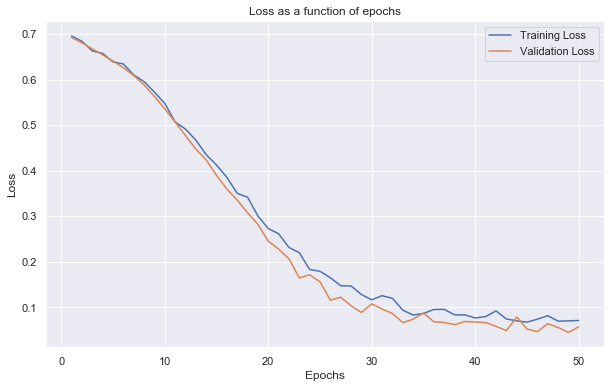

In [20]:
# Visualizing model performance
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
epochs = range(1,len(H.history["loss"]) + 1)
plt.plot(epochs,H.history["loss"],label="Training Loss")
plt.plot(epochs,H.history["val_loss"], label="Validation Loss")
plt.title("Loss as a function of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [11]:
# More performance metrics
loss, acc = model.evaluate(X_train, y_train, verbose=0)
loss, acc

(0.053453318110094385, 0.9835681)

In [12]:
# Evaluating the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
test_loss, test_acc

(0.16928227678253935, 0.96503496)